In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insurance-data.csv')
pd.options.display.max_columns =None
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# first chack duplicated


In [3]:
df.duplicated().sum()

1

In [4]:
df.shape

(1338, 7)

# then drop the duplicated

In [5]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [6]:
df.shape

(1337, 7)

# atternative to info()

In [7]:
def columns_info(df):
    colms=[]
    dtypes=[]
    unique=[]
    nunique=[]
    nulls=[]
    
    for colm in df.columns:
        colms.append(colm)
        dtypes.append(df[colm].dtypes)
        unique.append(df[colm].unique())
        nunique.append(df[colm].nunique())
        nulls.append(df[colm].isna().sum())
    
    return pd.DataFrame({'columns':colms,
                         'Data type':dtypes,
                         'unique value':unique,
                         'Num of unique value':nunique,
                         'null value':nulls})
columns_info(df)

,columns,Data type,unique value,Num of unique value,null value
0,age,int64,"[19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 2...",47,0
1,sex,object,"[female, male]",2,0
2,bmi,float64,"[27.9, 33.77, 33.0, 22.705, 28.88, 25.74, 33.4...",548,0
3,children,int64,"[0, 1, 3, 2, 5, 4]",6,0
4,smoker,object,"[yes, no]",2,0
5,region,object,"[southwest, southeast, northwest, northeast]",4,0
6,charges,float64,"[16884.924, 1725.5523, 4449.462, 21984.47061, ...",1337,0


>- we have not a null valus

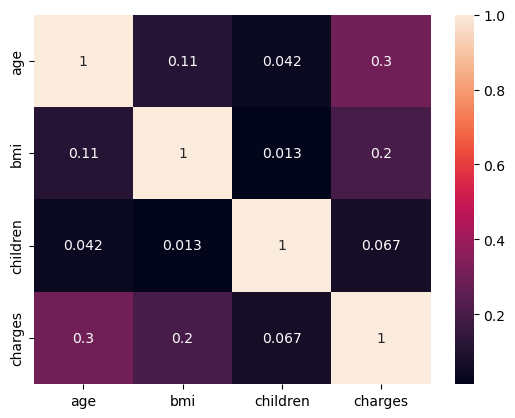

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# Handling Outliers using mean in continous features

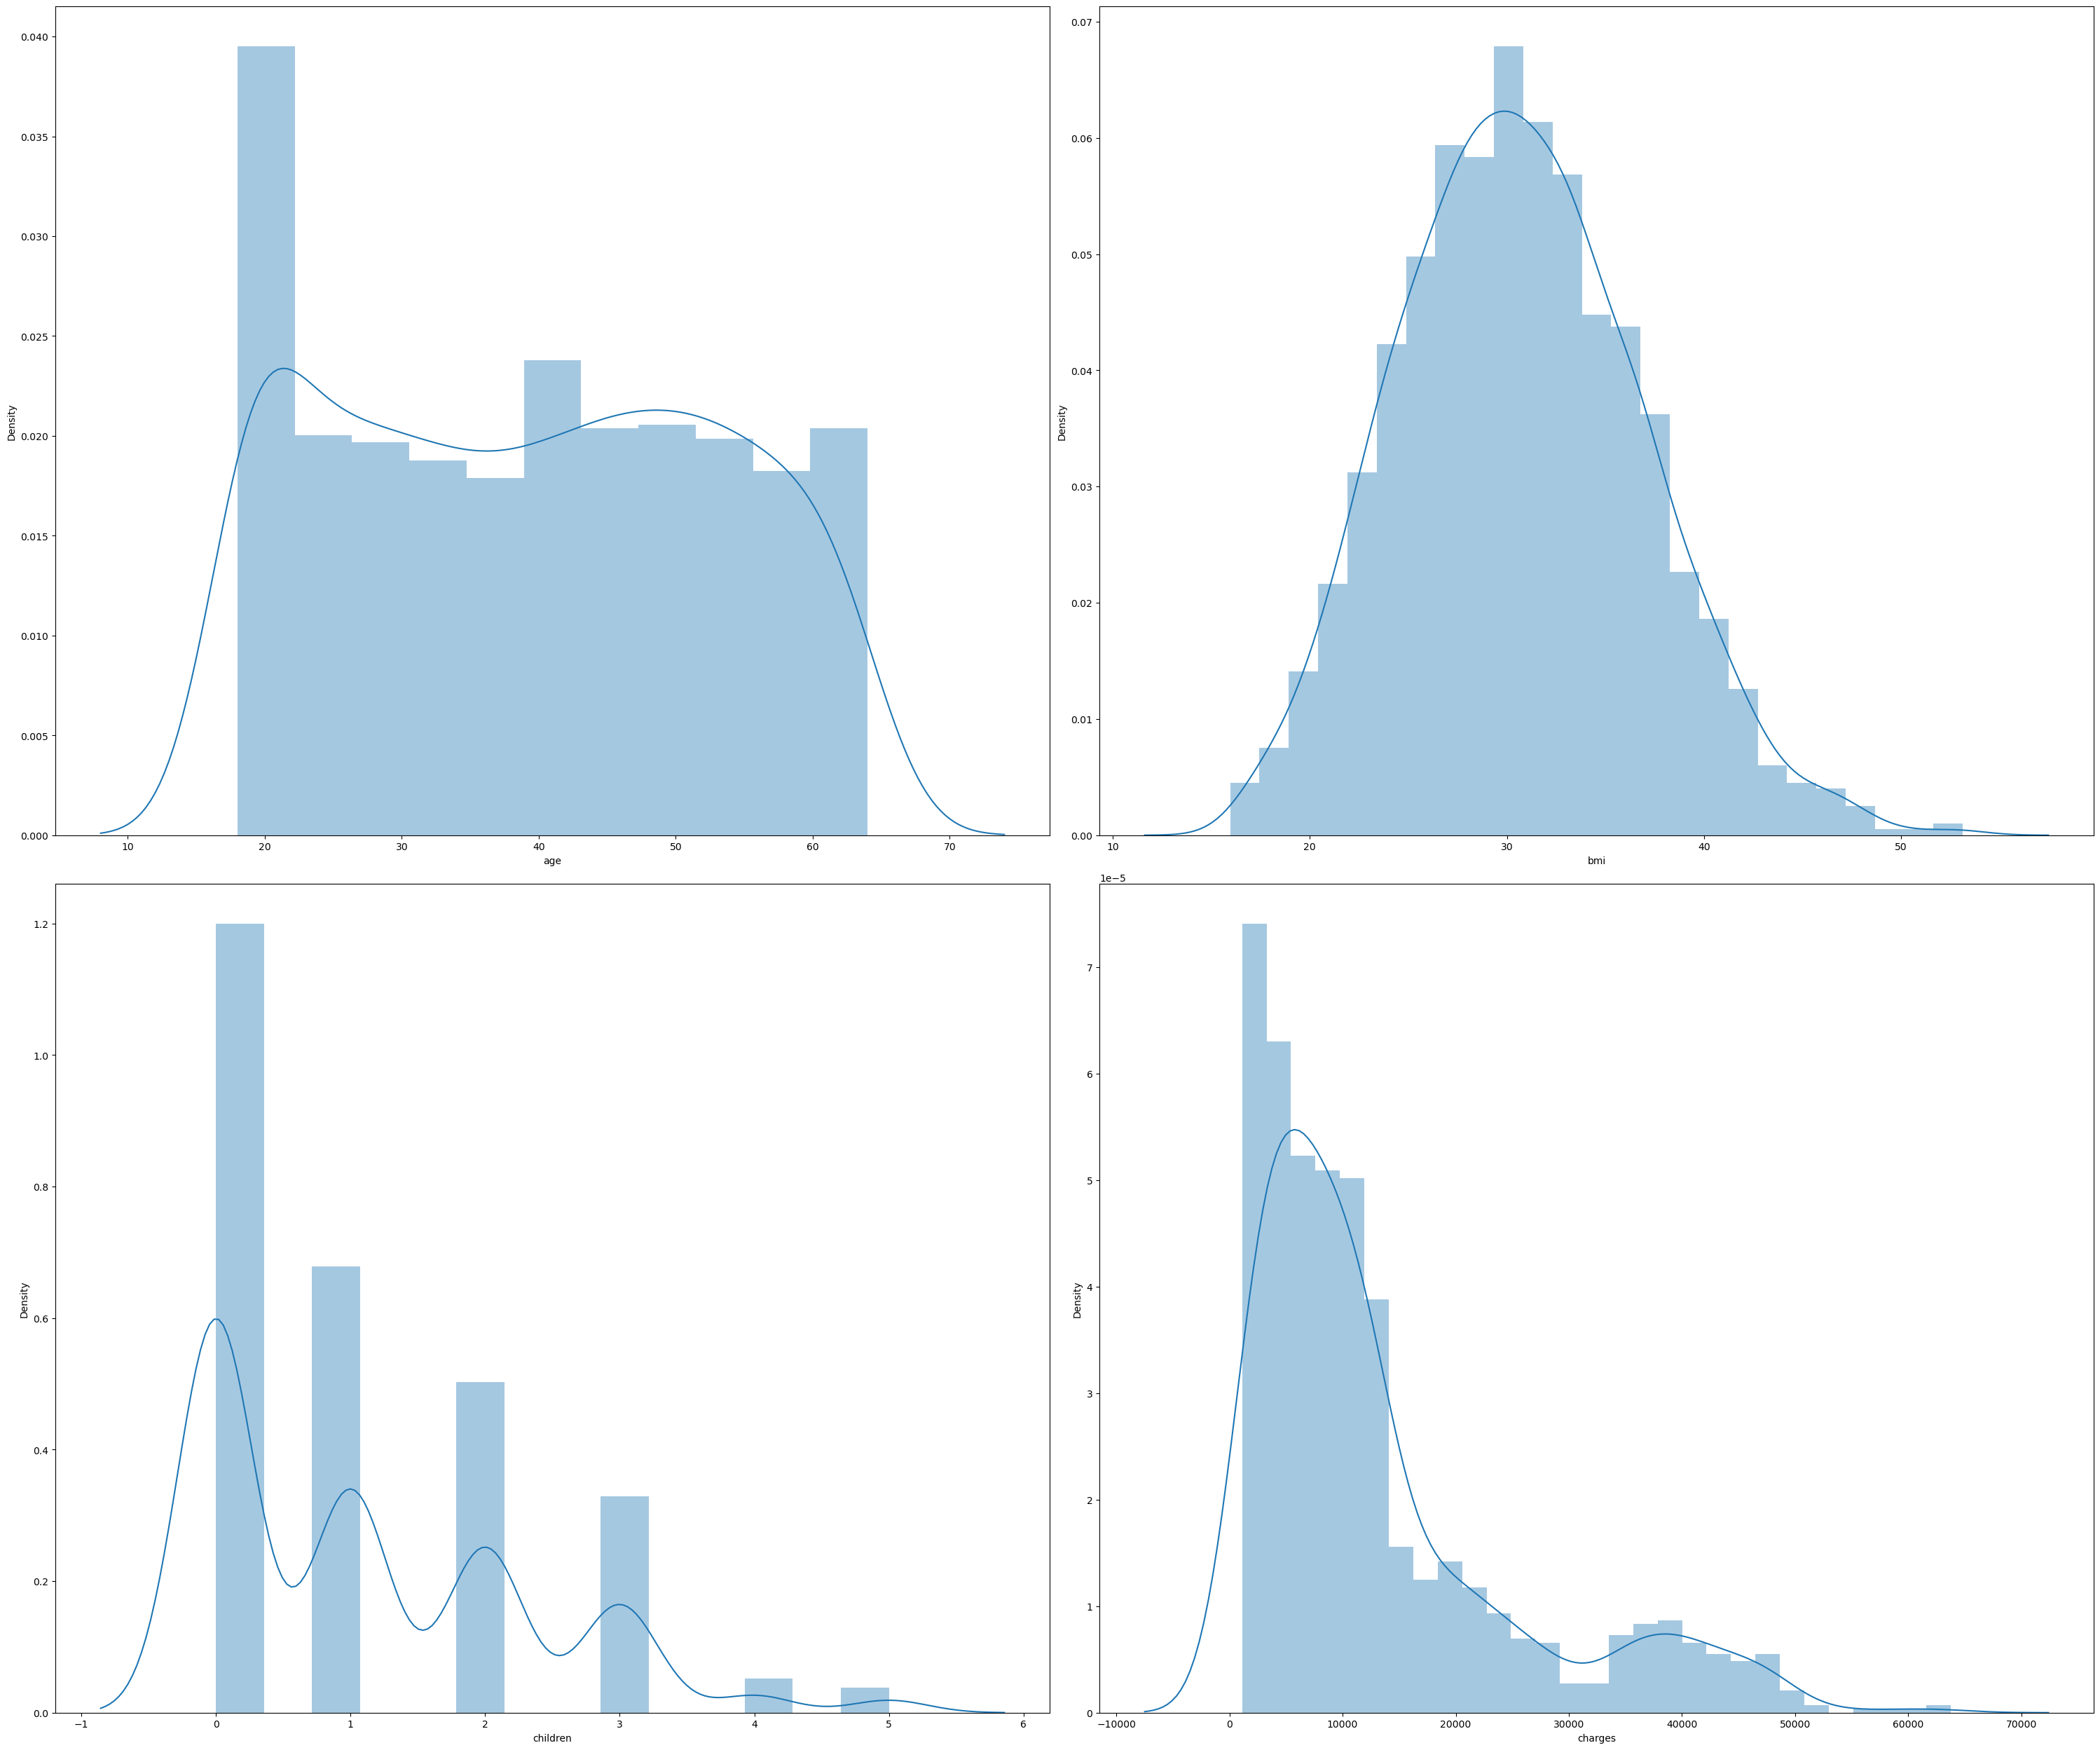

In [10]:
i=1
plt.figure(figsize=(30,25))
for col in df.columns:
    if df[col].dtype!='object':
        plt.subplot(2,2,i)
        sns.distplot(df[col])
        i+=1
plt.tight_layout(pad=0.8)
plt.show()     


# mean (stander deviation)

In [11]:
def check_outliers(col,df):
    mean = df[col].mean()
    st = df[col].std()
    lower_b=mean-3*st
    upper_b=mean+3*st
    outliers=[]
    for i in range(len(df)):
        if df.loc[i,col]<lower_b or df.loc[i,col]>upper_b :
            outliers.append(df.loc[i,col])
    return outliers

In [12]:
check_outliers('age',df)

[]

# conclusion
>- There is no outliers in age column

In [13]:
def handle_outliers(col,df):
    mean=df[col].mean()
    st=df[col].std()   
    lower_b=mean-3*st
    upper_b=mean+3*st
    for i in range(len(df)):
        if df.loc[i,col]>upper_b :
                df.loc[i,col]=upper_b
        elif df.loc[i,col]<lower_b:
            df.loc[i,col]=lower_b

In [14]:
check_outliers('bmi',df)

[49.06, 50.38, 52.58, 53.13]

In [15]:
handle_outliers('bmi',df)

In [16]:
check_outliers('bmi',df)

[48.96485698651381, 48.96485698651381, 48.96485698651381, 48.96485698651381]

# conclusion
>-we handled outliers in bmi column

# Explatory Data Analysis

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
def plot_value_counts(df,column_name,normalize = True,n_max_categories = 10):
    if df[column_name].nunique() > n_max_categories :
        return
    ax = df[column_name].value_counts(normalize = normalize).plot(kind ='bar')
    ax.set_title(column_name)
    plt.show()    

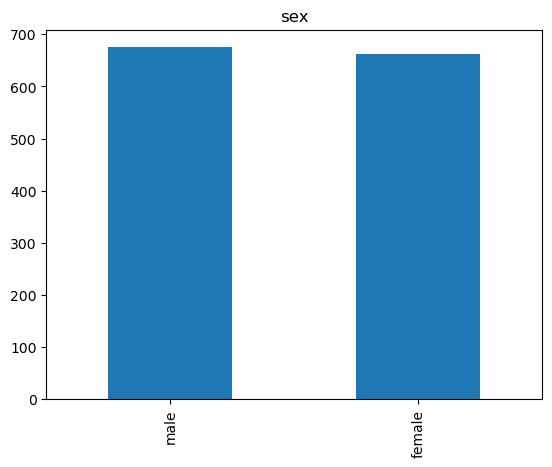

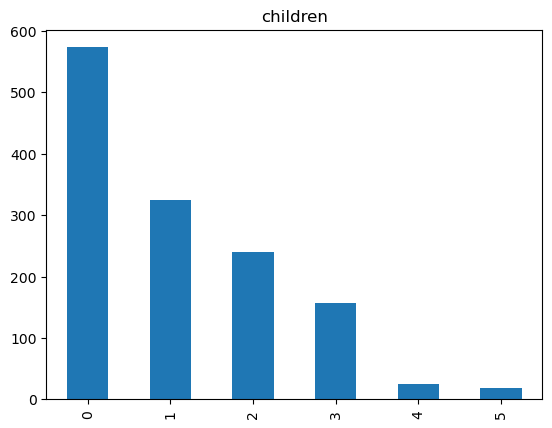

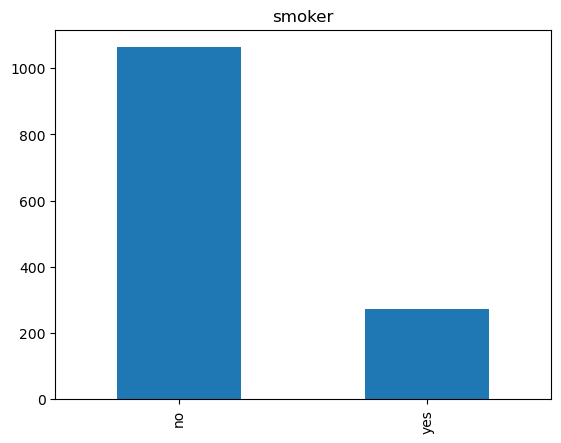

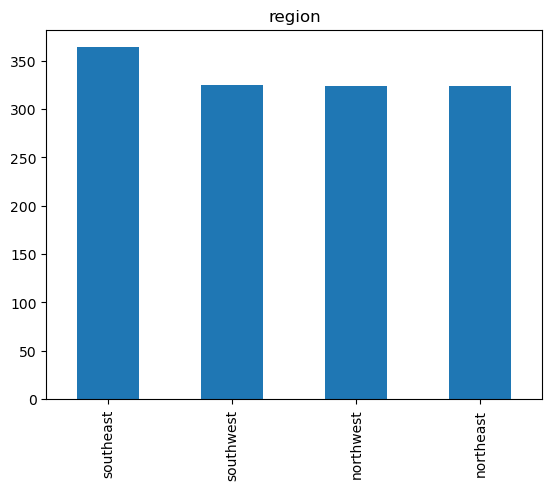

In [19]:
for col in df.columns :
    plot_value_counts(df,col,False,8)  

>- From this EDA we have more non-smokers in the insurance.
>- and Most people that is included in insurance has 0 childern
>- have males more than females slightly

# 1- Age

In [20]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [21]:
df['age'].nunique()

47

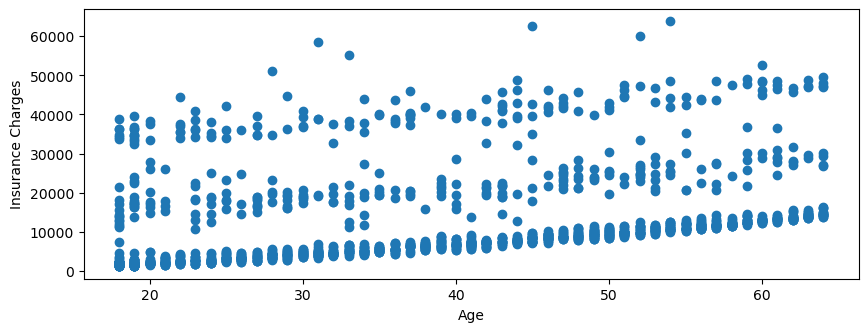

In [22]:
plt.figure(figsize=(10,3.5))
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

>- here is a linear relation between age and insurance cost

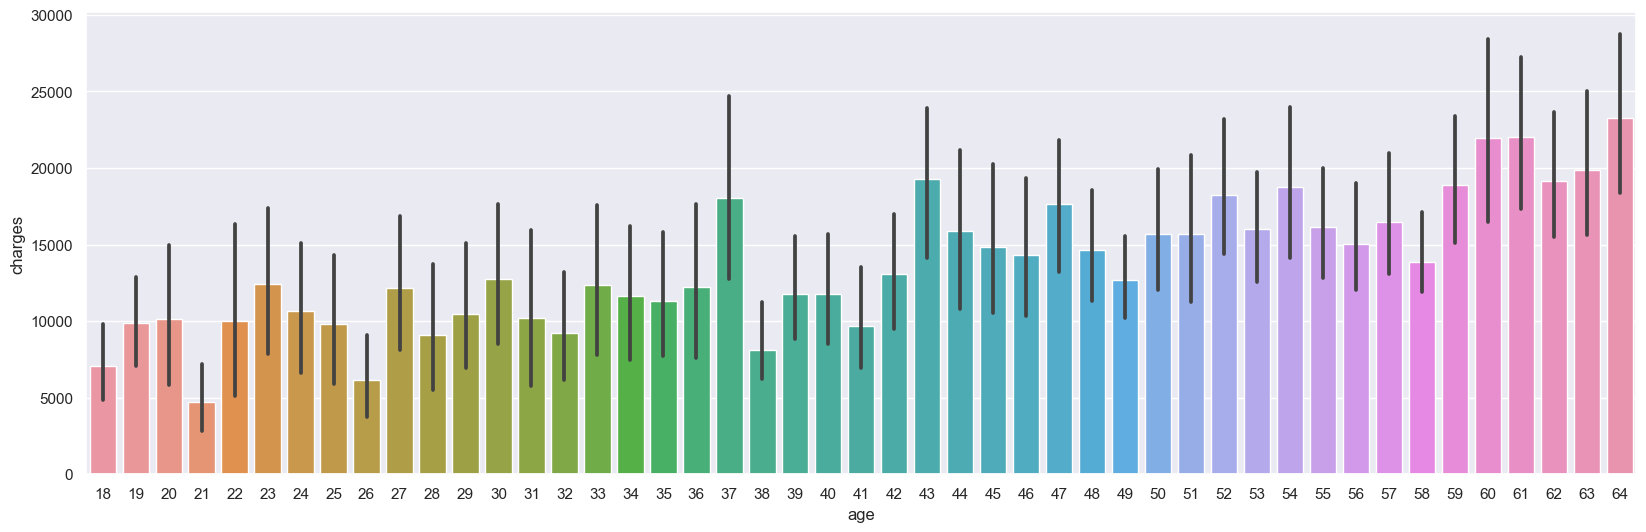

In [23]:
sns.set()
plt.figure(figsize=(20,6))
sns.barplot(x= 'age', y='charges', data=df)
plt.show()

>- As we get older in age, we will likely have to visit medical centers,so the insurance increases

# What if the person is a smoker, Do the charges differ?

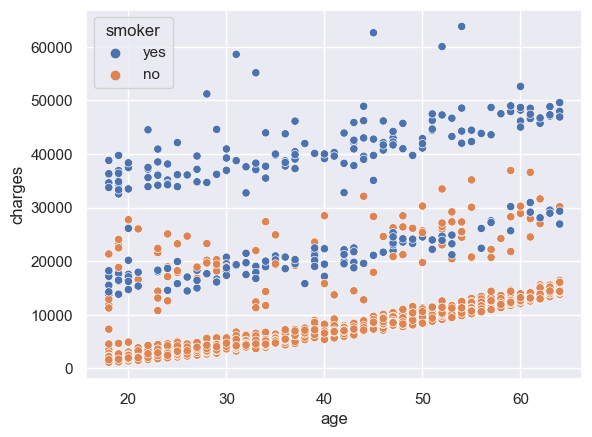

In [24]:
sns.scatterplot(x= 'age' , y= 'charges' , data= df , hue= 'smoker')
plt.show()

>- People that smokes pay a higher insurance cost than people that doesn't smoke

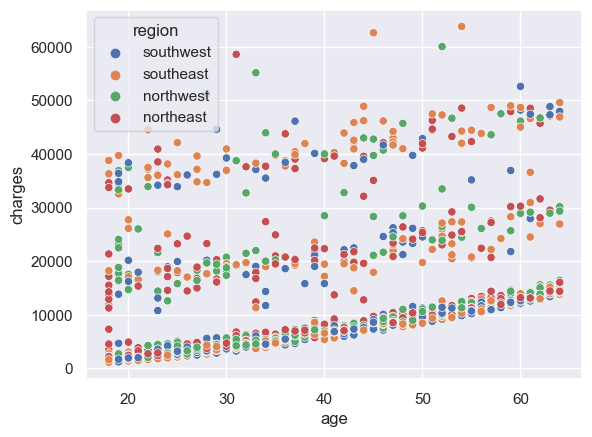

In [25]:
sns.scatterplot(x= 'age' , y= 'charges' , data= df , hue= 'region')
plt.show()

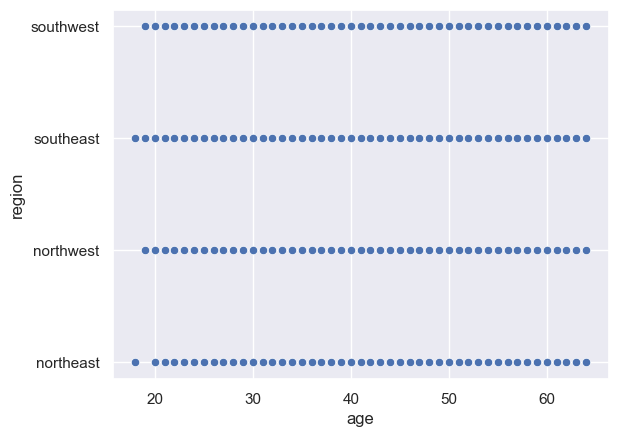

In [26]:
sns.scatterplot(x='age',y='region',data =df)
plt.show()

>- As we see the age and region are both independent Features


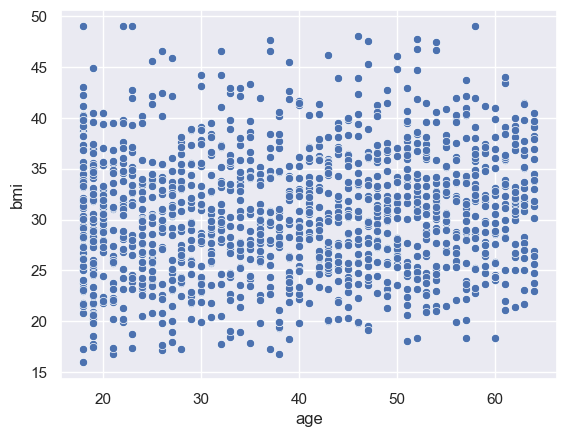

In [27]:
sns.scatterplot(x='age',y='bmi',data =df)
plt.show()

>- And also the body mass index is also independent with the age and so on for other features


# 2- bmi

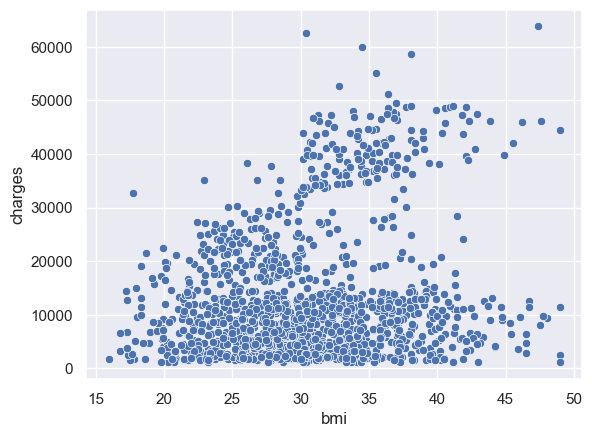

In [28]:
sns.scatterplot(x='bmi',y='charges',data =df)
plt.show()


>- The BMI doesn't have a real effect on insurance charges in this figure but there is a weak relation if the person is more obesed, he will get a higher insurance


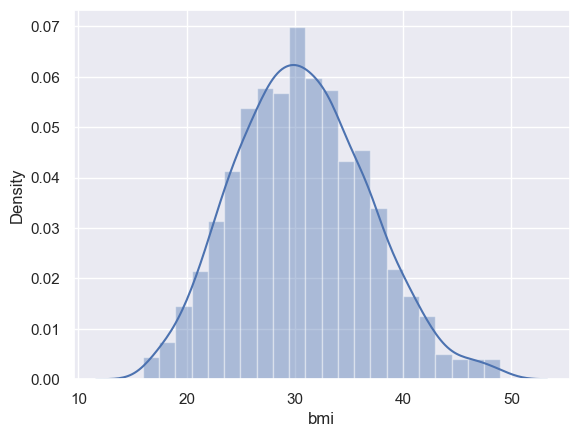

In [29]:
sns.distplot(df['bmi'])
plt.show()

>- With a value equal to 30 starts obesity. Let's start to explore! First, let's look at the distribution of costs in people with BMI greater than 30 and less than 30.

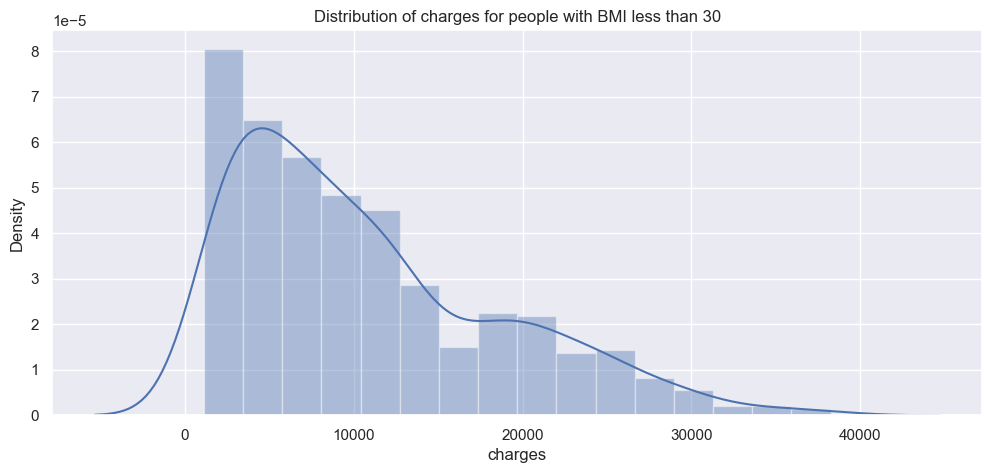

In [30]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for people with BMI less than 30")
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.show()

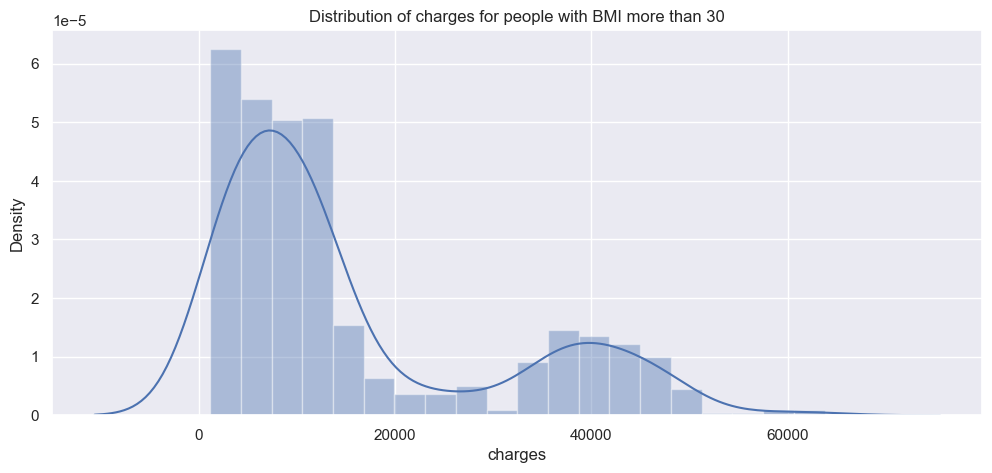

In [31]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for people with BMI more than 30")
sns.distplot(df[(df.bmi > 30)]['charges'])
plt.show()

>- People with BMI above 30 will pay more insurance charges due to the probabilty of obesity problems

# What about the number of children?


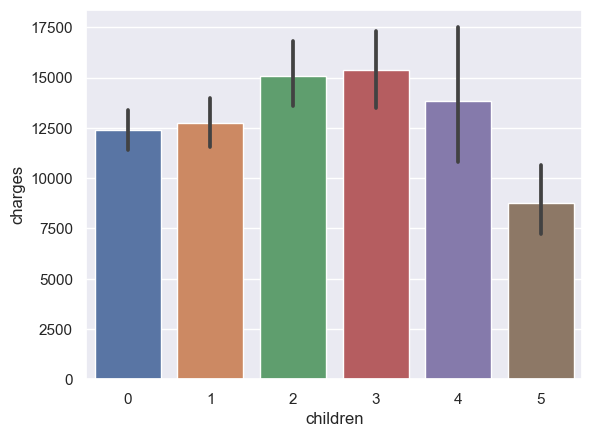

In [32]:
sns.barplot(x='children',y='charges',data =df)
plt.show()

>- As we see when you have more children your insurance cost will decrease


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Turn Categorical Data into numeric


>- First i will use label encoder for sex and smoker
>- second i will use one hot encoder for region to not biases one region to another

In [34]:
df['smoker']=df['smoker'].map({'no':0 ,'yes':1})
df['sex']=df['sex'].map({'female':0,'male':1})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [35]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


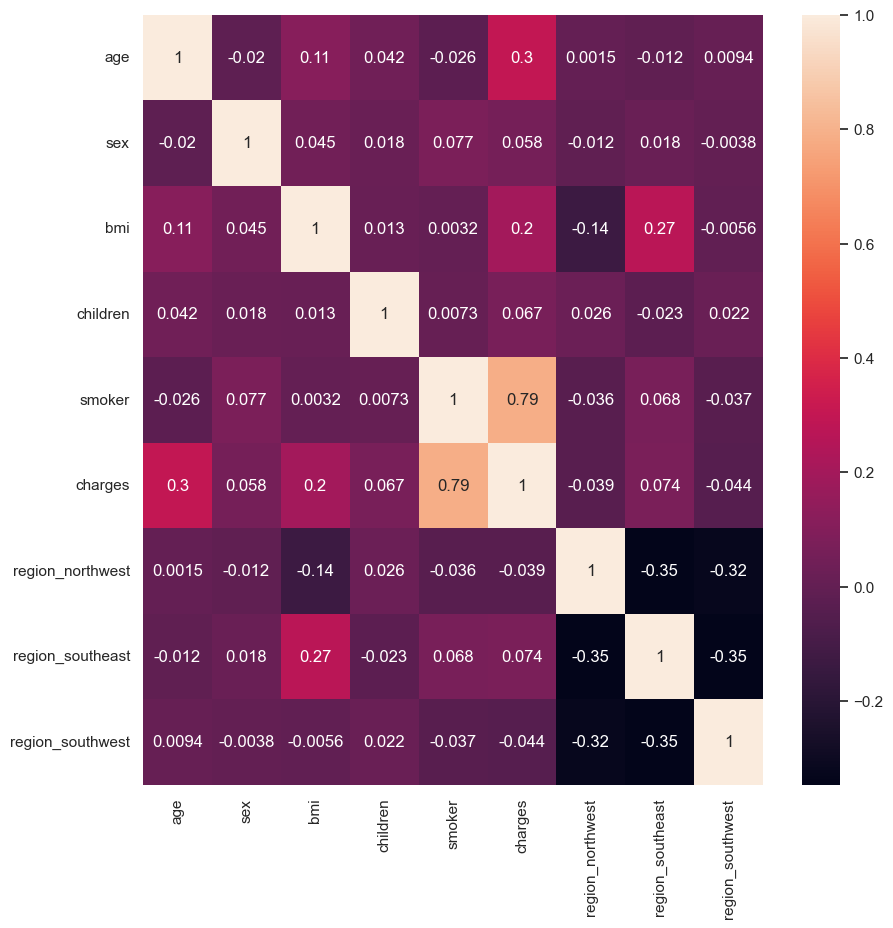

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot =True)
plt.show()